In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


**PRICE IS IN EUROS**

# EDA

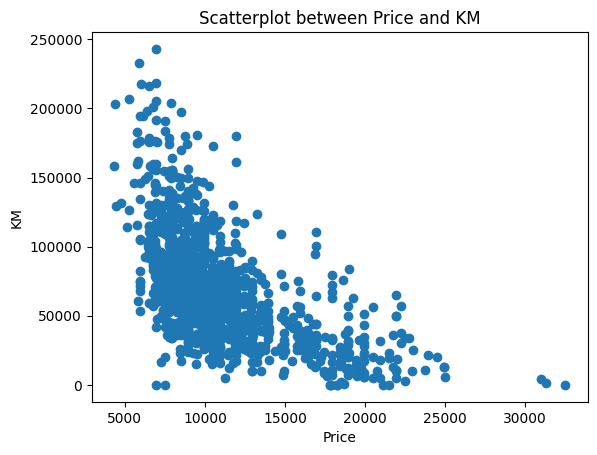

In [ ]:
plt.scatter(data['Price'], data['KM'])
plt.xlabel("Price")
plt.ylabel("KM")
plt.title("Scatterplot between Price and KM")
plt.show()


**KM AND PRICE ARE INVERSELY PROPORTIONAL. AS KM ARE INCREASING THE PRICE VALUE OF TOYOTA IS DECREASING.**

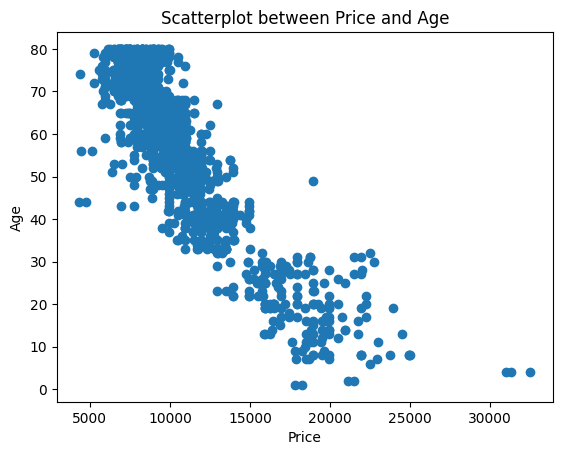

In [ ]:
plt.scatter(data['Price'], data['Age_08_04'])
plt.xlabel("Price")
plt.ylabel("Age")
plt.title("Scatterplot between Price and Age")
plt.show()

**AGE AND PRICE ARE ALSO INVERSELY RELATED, AS AGE IS INCREASING THE PRICE VALUE IS REDUCING.**

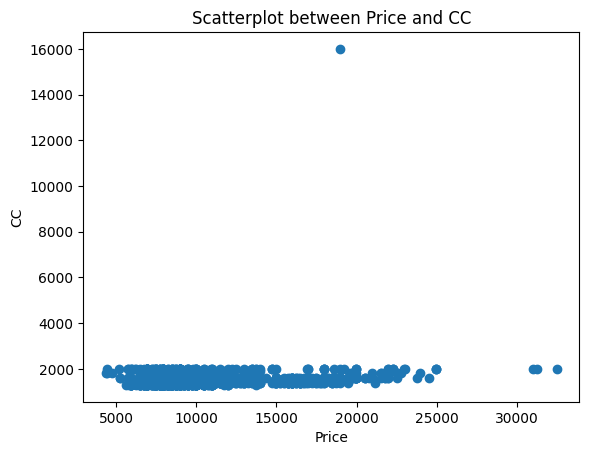

In [ ]:
plt.scatter(data['Price'], data['cc'])
plt.xlabel("Price")
plt.ylabel("CC")
plt.title("Scatterplot between Price and CC")
plt.show()

**ALL THE CC ARE IN SAME RANGE EXCEPT 16000, IT IS VERY HIGH THAN OTHER VALUES SO IT IS CONSIDERED AS OUTLIER.**

In [ ]:
data['cc'].value_counts()

cc
1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: count, dtype: int64

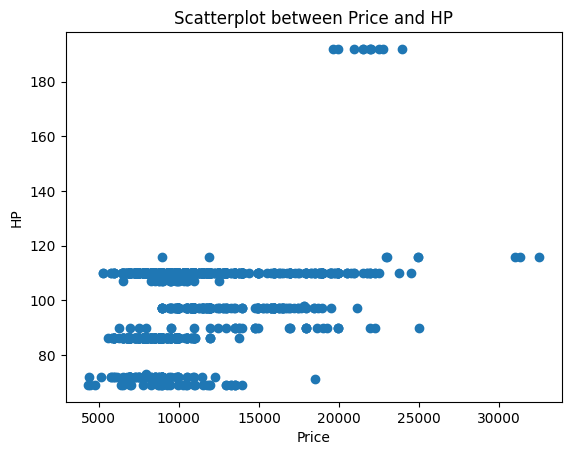

In [ ]:
plt.scatter(data['Price'], data['HP'])
plt.xlabel("Price")
plt.ylabel("HP")
plt.title("Scatterplot between Price and HP")
plt.show()

**WE CAN CLEARLY SEE THAT THERE ARE SOME OUTLIERS IN HP VARIABLE.**

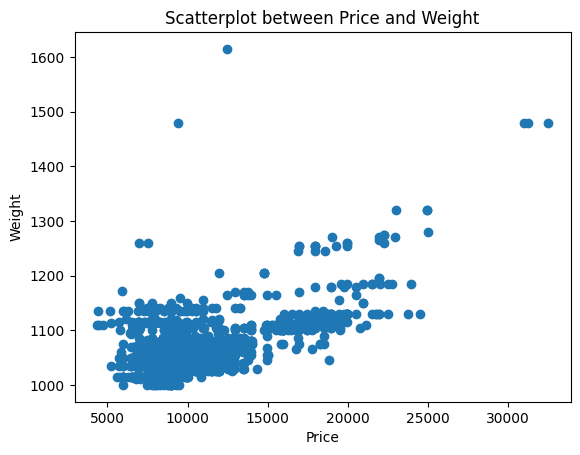

In [ ]:
plt.scatter(data['Price'], data['Weight'])
plt.xlabel("Price")
plt.ylabel("Weight")
plt.title("Scatterplot between Price and Weight")
plt.show()

**WEIGHT AND PRICE DOES NOT HAVE A MUCH RELATIONSHIP BUT YES THERE ARE SOME OUTLIERS IN THIS VARIABLE.**

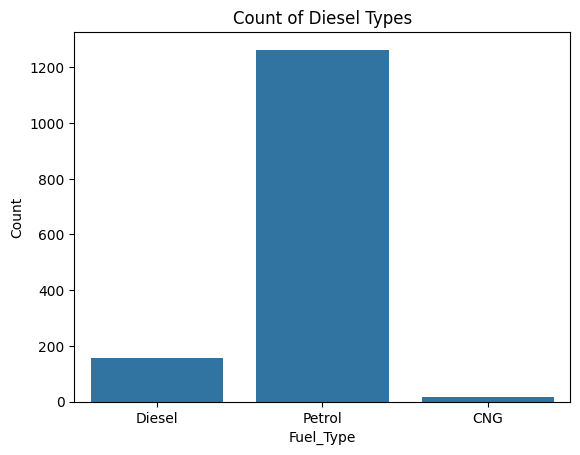

In [ ]:
sns.countplot(x='Fuel_Type', data=data)
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.title('Count of Diesel Types')
plt.show()


**MOST OF THE CARS HAVE PETROL FUEL TYPE AND ONLY FEW CARS HAVE CNG.**

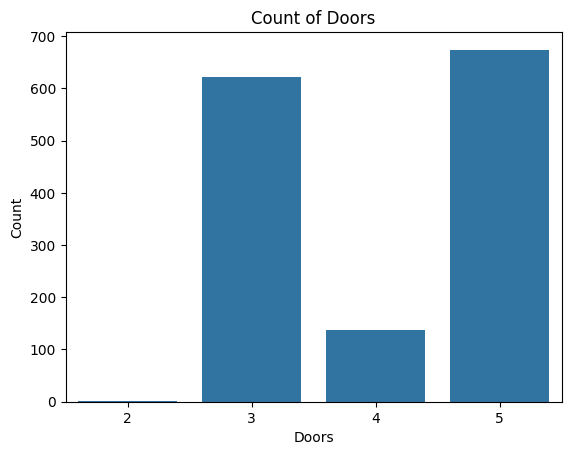

In [ ]:
sns.countplot(x='Doors', data=data)
plt.xlabel('Doors')
plt.ylabel('Count')
plt.title('Count of Doors')
plt.show()

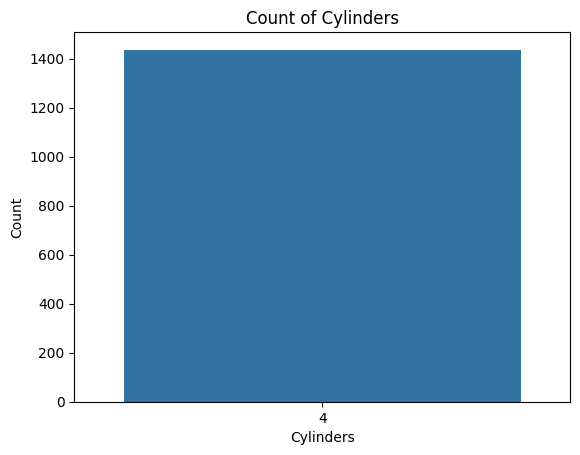

In [ ]:
sns.countplot(x='Cylinders', data=data)
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.title('Count of Cylinders')
plt.show()


**ALL THE CARS HAVE SAME NUMBER OF CYLINDERS I.E 4, SO THIS VRAIABLE WON'T HELP US MUCH IN PREDICTING THE PRICE.**

**DROPPING CYLINDER VARIABLE.**

In [ ]:
data.drop(columns=['Cylinders'], inplace=True)

In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


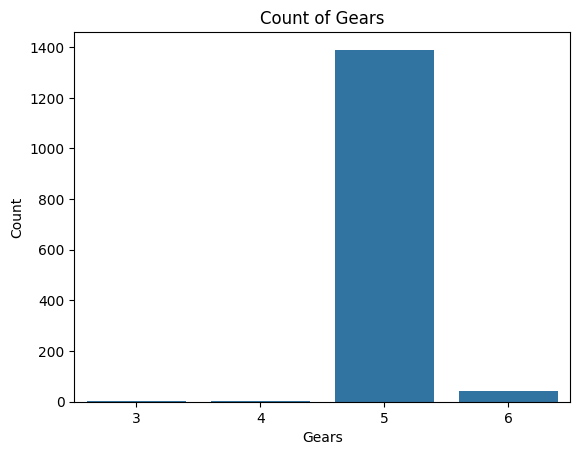

In [ ]:
sns.countplot(x='Gears', data=data)
plt.xlabel('Gears')
plt.ylabel('Count')
plt.title('Count of Gears')
plt.show()

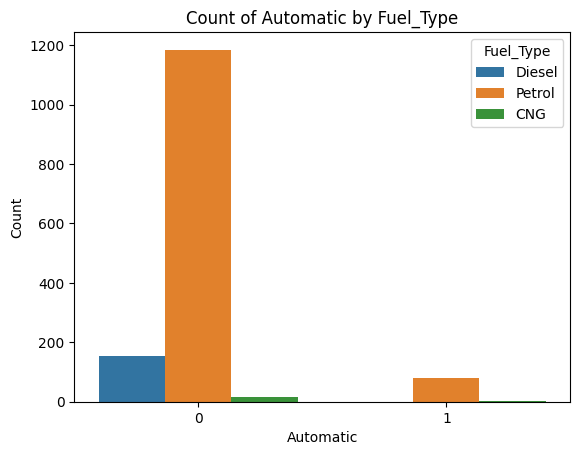

In [ ]:
sns.countplot(x='Automatic', hue='Fuel_Type', data=data)
plt.xlabel('Automatic')
plt.ylabel('Count')
plt.title('Count of Automatic by Fuel_Type')
plt.show()


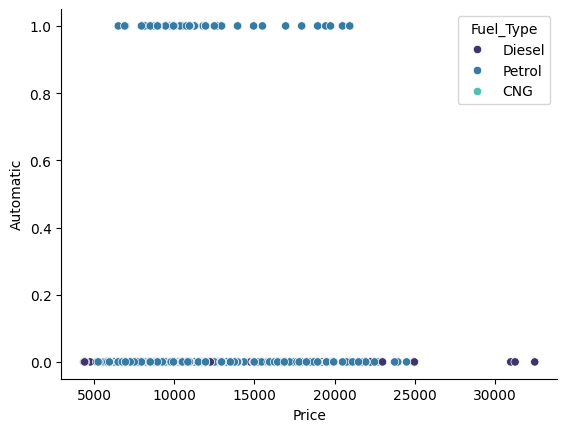

In [ ]:
sns.scatterplot(data=data, x="Price", y = 'Automatic' ,hue="Fuel_Type", palette="mako")
plt.gca().spines[['top', 'right',]].set_visible(False)

**WE CAN SEE THAT DEISEL CARS ONLY NON-AUTOMATIC.**

**MOSTLY PETROL CARS ARE AUTOMATIC.**

**DEISEL CARS HAVE MORE PRICE.**

# OUTLIER TREATMENT

<Axes: >

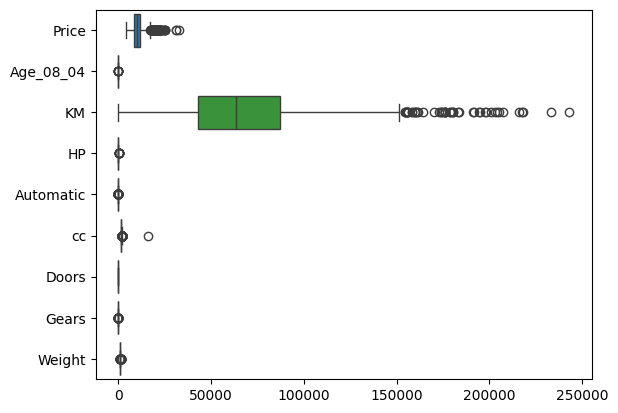

In [ ]:
sns.boxplot(data, orient = 'h')

(array([122., 331., 417., 301., 140.,  64.,  30.,  17.,  12.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

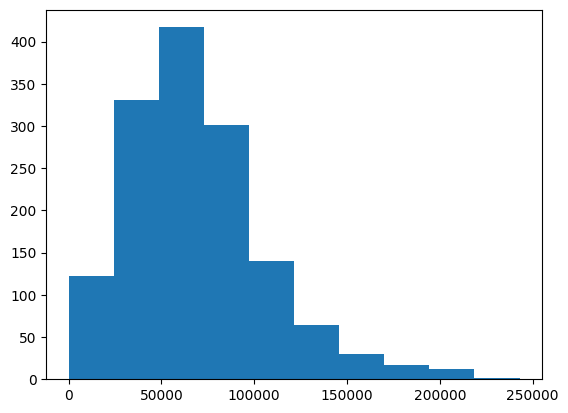

In [ ]:
plt.hist(data["KM"])


**THE DATA IS POSITIVE SKEWED.**

<Axes: ylabel='KM'>

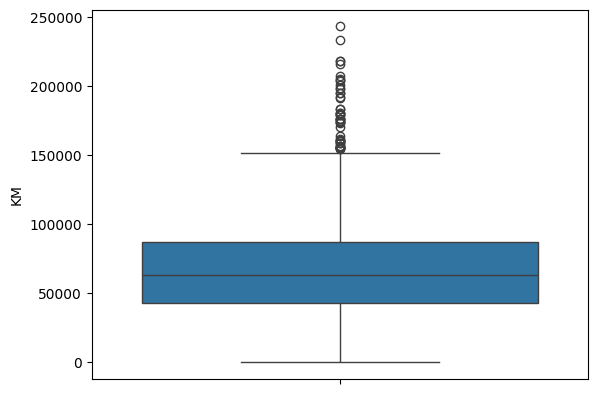

In [ ]:
sns.boxplot(data['KM'])

In [ ]:
percentile25 = data['KM'].quantile(0.25)
percentile75 = data['KM'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = data.copy()

new_data['KM'] = np.where(
    new_data['KM'] > upper_limit,
    upper_limit,
    np.where(
        new_data['KM'] < lower_limit,
        lower_limit,
        new_data['KM']
    )
)

<ipython-input-50-c3e1e8230a2e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['KM'])
<ipython-input-50-c3e1e8230a2e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['KM'])


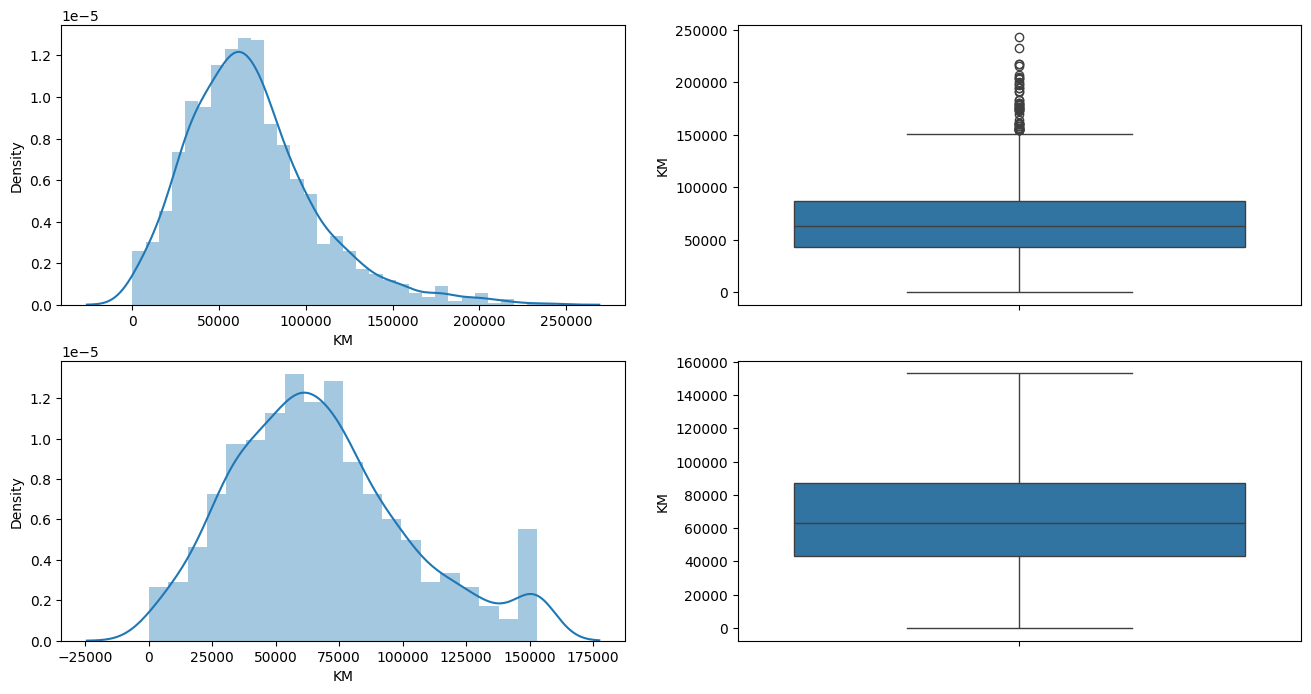

In [ ]:
# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['KM'])

plt.subplot(2,2,2)
sns.boxplot(data['KM'])

plt.subplot(2,2,3)
sns.distplot(new_data['KM'])

plt.subplot(2,2,4)
sns.boxplot(new_data['KM'])

plt.show()

**NOW THE KM IS NORMALLY DISTRIBUTED AND HAS NO OUTLIERS.**

<Axes: ylabel='Price'>

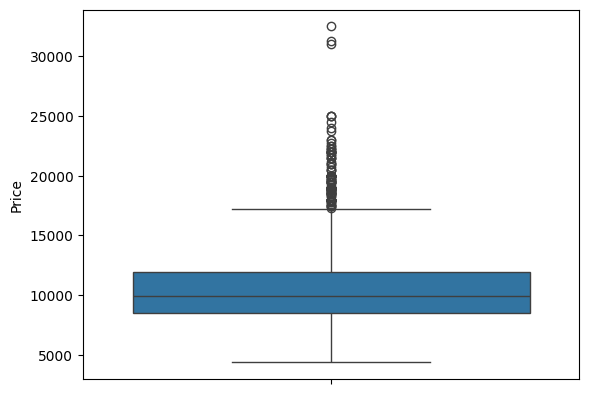

In [ ]:
sns.boxplot(new_data['Price'])

In [ ]:
percentile25 = data['Price'].quantile(0.25)
percentile75 = data['Price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Price'] = np.where(
    new_data['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Price'] < lower_limit,
        lower_limit,
        new_data['Price']
    )
)

<ipython-input-52-368d7075af45>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])
<ipython-input-52-368d7075af45>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Price'])


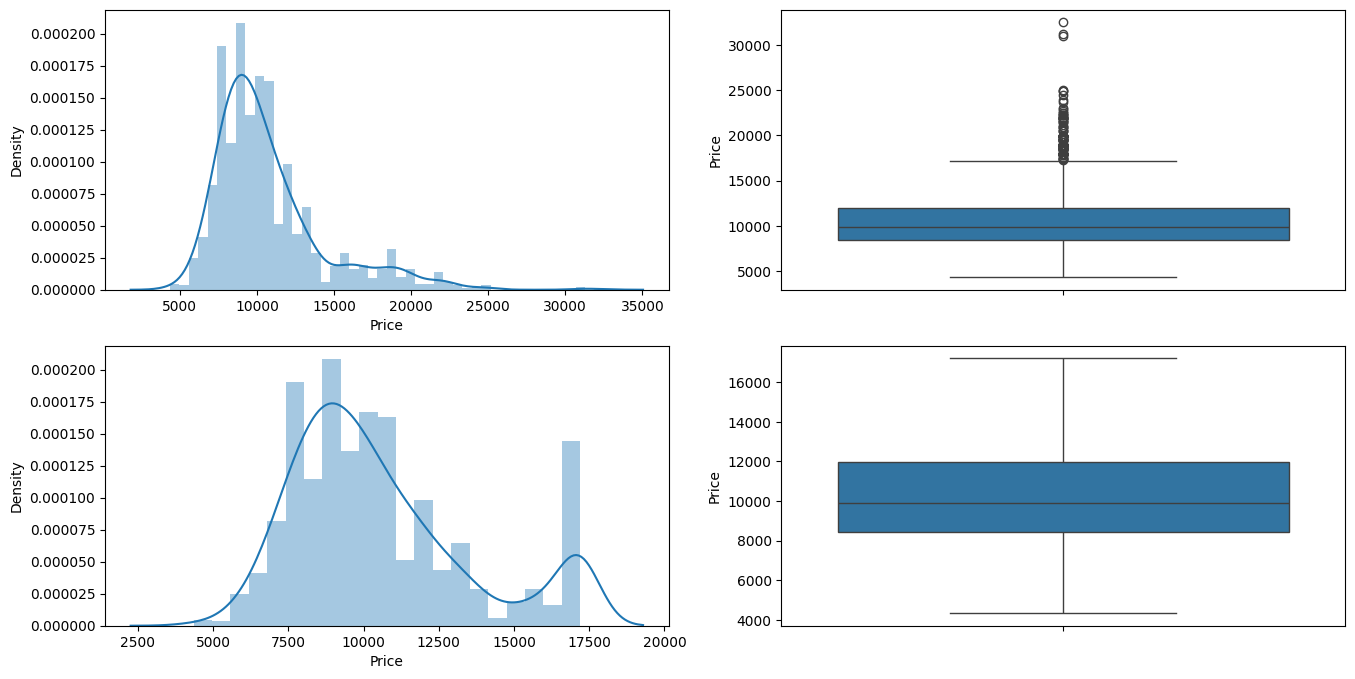

In [ ]:
# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Price'])

plt.subplot(2,2,2)
sns.boxplot(data['Price'])

plt.subplot(2,2,3)
sns.distplot(new_data['Price'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Price'])

plt.show()

**THE DATA HAS BECOME NORMALLY DISTRIBUTED BUT THE UPPER LIMIT HAS INCREASED BECAUSE OF REPLACING OUTLIERS WITH THEM.**

In [ ]:
percentile25 = data['Weight'].quantile(0.25)
percentile75 = data['Weight'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Weight'] = np.where(
    new_data['Weight'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Weight'] < lower_limit,
        lower_limit,
        new_data['Weight']
    )
)

<ipython-input-9-271fc95a40b8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])
<ipython-input-9-271fc95a40b8>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Weight'])


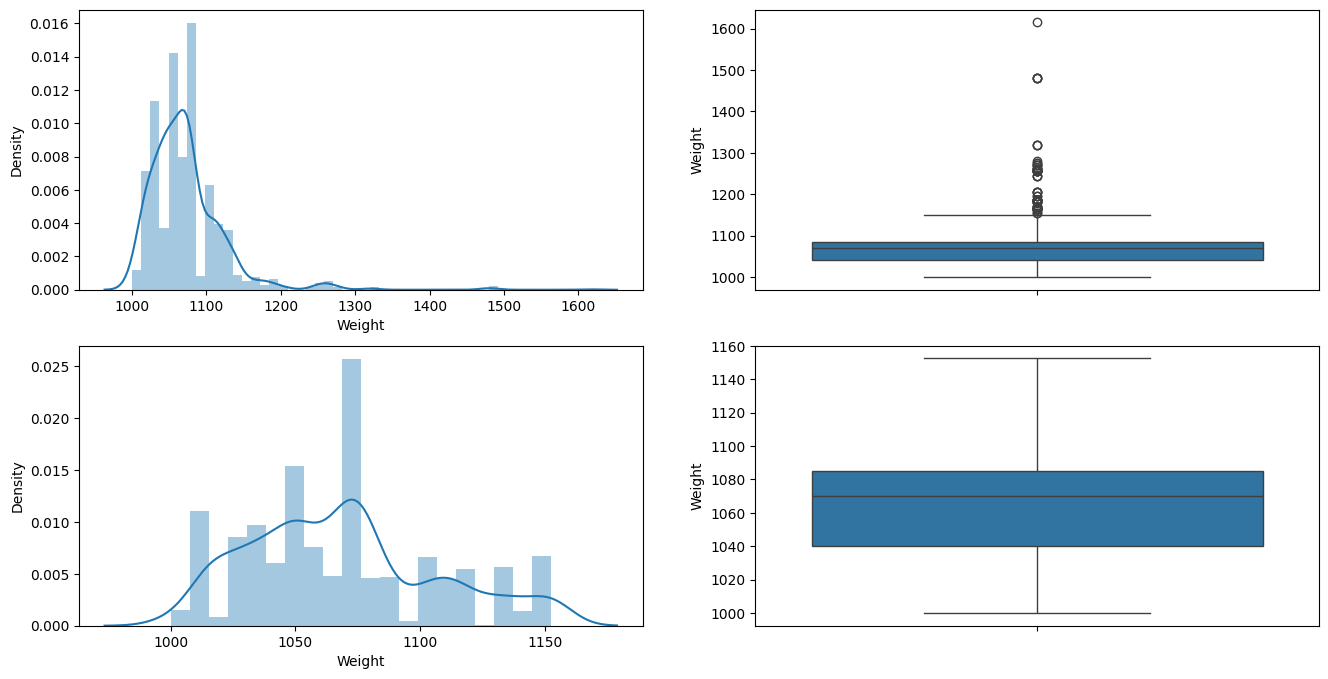

In [ ]:
# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Weight'])

plt.subplot(2,2,2)
sns.boxplot(data['Weight'])

plt.subplot(2,2,3)
sns.distplot(new_data['Weight'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Weight'])

plt.show()

<Axes: >

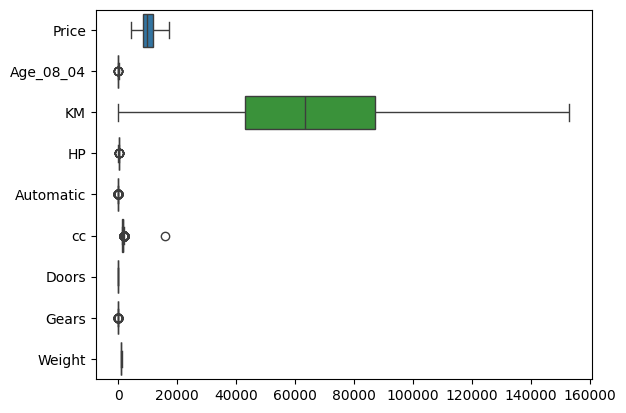

In [ ]:
sns.boxplot(new_data, orient = 'h')

In [ ]:
percentile25 = data['cc'].quantile(0.25)
percentile75 = data['cc'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['cc'] = np.where(
    new_data['cc'] > upper_limit,
    upper_limit,
    np.where(
        new_data['cc'] < lower_limit,
        lower_limit,
        new_data['cc']
    )
)

<ipython-input-11-c1468c2c32d5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cc'])
<ipython-input-11-c1468c2c32d5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['cc'])


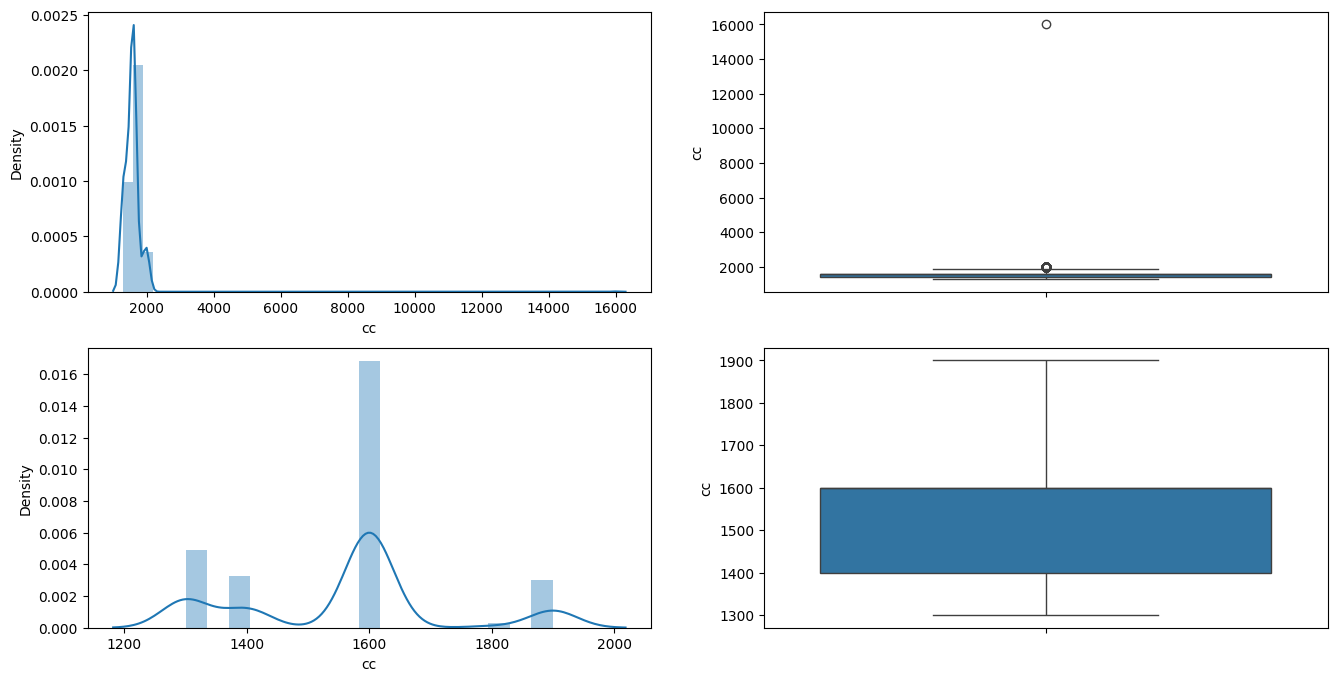

In [ ]:
# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['cc'])

plt.subplot(2,2,2)
sns.boxplot(data['cc'])

plt.subplot(2,2,3)
sns.distplot(new_data['cc'])

plt.subplot(2,2,4)
sns.boxplot(new_data['cc'])

plt.show()

**NOW OUR DATA HAS NO MAJOR OUTLIERS THAT WILL AFFECT THE MODEL.**

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   float64
 1   Age_08_04  1436 non-null   int64  
 2   KM         1436 non-null   float64
 3   Fuel_Type  1436 non-null   object 
 4   HP         1436 non-null   int64  
 5   Automatic  1436 non-null   int64  
 6   cc         1436 non-null   float64
 7   Doors      1436 non-null   int64  
 8   Gears      1436 non-null   int64  
 9   Weight     1436 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 112.3+ KB


**OUR DATA HAS NO MISSING VALUES.**

# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in new_data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  new_data[col] = new_data[col].astype(str)
  new_data[col] = le.fit_transform(new_data[col])

In [ ]:
new_data.head(12)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23,46986.0,1,90,0,1900.0,3,5,1152.5
1,13750.0,23,72937.0,1,90,0,1900.0,3,5,1152.5
2,13950.0,24,41711.0,1,90,0,1900.0,3,5,1152.5
3,14950.0,26,48000.0,1,90,0,1900.0,3,5,1152.5
4,13750.0,30,38500.0,1,90,0,1900.0,3,5,1152.5
5,12950.0,32,61000.0,1,90,0,1900.0,3,5,1152.5
6,16900.0,27,94612.0,1,90,0,1900.0,3,5,1152.5
7,17200.0,30,75889.0,1,90,0,1900.0,3,5,1152.5
8,17200.0,27,19700.0,2,192,0,1800.0,3,5,1152.5
9,12950.0,23,71138.0,1,69,0,1900.0,3,5,1105.0


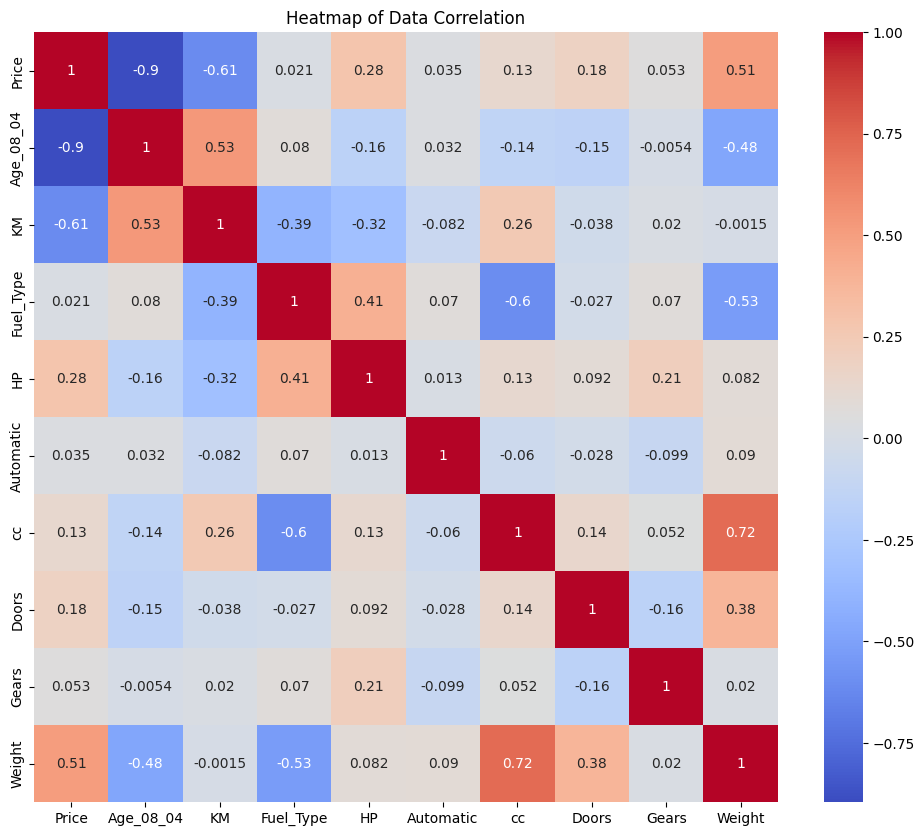

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Data Correlation', fontsize=12)
plt.show()

# STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=new_data.columns)

# Display the first few rows of the scaled data
scaled_data.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,1.006237,-1.771966,-0.593750,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
1,1.090108,-1.771966,0.153546,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
2,1.157205,-1.718184,-0.745652,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
3,1.492688,-1.610620,-0.564551,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
4,1.090108,-1.395491,-0.838117,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387


# MLR

In [ ]:
y= scaled_data['Price']
x= scaled_data.drop(columns=['Price'])

In [ ]:
x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,-1.771966,-0.593750,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
1,-1.771966,0.153546,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
2,-1.718184,-0.745652,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
3,-1.610620,-0.564551,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387
4,-1.395491,-0.838117,-2.337868,-0.768042,-0.242893,2.021383,-1.085139,-0.140425,2.222387


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))


Mean squared error: 0.1324650717364299
R squared score: 0.8630123145282336


# RIDGE REGULARISATION

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred = ridge_model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))


Mean squared error: 0.13246517999714794
R squared score: 0.8630122025712852


In [ ]:
from sklearn.linear_model import RidgeCV

# Define the range of alpha values to evaluate
alphas = np.arange(0.1, 10, 0.1)

# Create a RidgeCV object with the specified alpha values
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')

# Fit the RidgeCV object to the training data
ridge_cv.fit(x_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.alpha_

# Print the best alpha value
print("Best alpha value:", best_alpha)

# Create a new Ridge regression model with the best alpha value
best_ridge_model = Ridge(alpha=best_alpha)

# Fit the new model to the training data
best_ridge_model.fit(x_train, y_train)

# Predict using the new model
y_pred = best_ridge_model.predict(x_test)

# Evaluate the new model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))


Best alpha value: 8.4
Mean squared error: 0.13250833755940128
R squared score: 0.8629675715263903


In [ ]:
pd.DataFrame({'ALPHA': {0: 0.1, 1: 6, 2: 1, 3: 8}, 'ACCURACY': {0: '86.30%', 1: '86.29%', 2: '86.30%', 3 : '86.29%'}, 'Mean Square Error': {0: '13.2465', 1: '13.2489', 2: '13.2466', 3 : '13.2504'}})

,ALPHA,ACCURACY,Mean Square Error
0,0.1,86.30%,13.2465
1,6.0,86.29%,13.2489
2,1.0,86.30%,13.2466
3,8.0,86.29%,13.2504


**The best alpha is 0.1, as it is getting maximum accuracy and minimum mean sqaure error.**

# LASSO REGULARISATION

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))


Mean squared error: 0.16277558607239484
R squared score: 0.8316669406125772


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))

Mean squared error: 0.43904037595460105
R squared score: 0.5459699365101789


In [ ]:
#Define the range of alpha values to evaluate
from sklearn.linear_model import LassoCV
lasso_alphas = np.arange(0.1, 10, 0.1)

# Create a LassoCV object with the specified alpha values
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5)

# Fit the LassoCV object to the training data
lasso_cv.fit(x_train, y_train)

# Get the best alpha value
best_lasso_alpha = lasso_cv.alpha_

# Print the best alpha value
print("Best alpha value:", best_lasso_alpha)

# Create a new Lasso regression model with the best alpha value
best_lasso_model = Lasso(alpha=best_lasso_alpha)

# Fit the new model to the training data
best_lasso_model.fit(x_train, y_train)

# Predict using the new model
y_pred = best_lasso_model.predict(x_test)

# Evaluate the new model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R squared score:", r2_score(y_test, y_pred))


Best alpha value: 0.1
Mean squared error: 0.16277558607239484
R squared score: 0.8316669406125772


# Comparing The Results

In [ ]:
pd.DataFrame({'Model': {0: 'MLR', 1: 'Ridge', 2: 'Lasso'}, 'R square Error': {0: '86.30%', 1: '86.30%', 2: '83.16%'}, 'Mean Square Error': {0: '13.24', 1: '13.24', 2: '16.27'}})

,Model,R square Error,Mean Square Error
0,MLR,86.30%,13.24
1,Ridge,86.30%,13.24
2,Lasso,83.16%,16.27


**REGULARISATION DID NOT AFFECT THE ACCURACY AS THE DATA IS NOT OVERFITTED.**

**RIDGE REGRESSION PERFORMED BETTER THAN LASSO IN THIS DATASET.**